## Data Wrangling

The process of transferring and mapping data from raw data into useable data is called data wrangling. what we are gonna learn in this section is how to use **pandas library** to manipulate our data. in pandas we represent our data as `DataFrame` that have **rows** and **columns** (exactly like a spreadsheet). each row represents our sample and has a specific **index**. also, each column is our feature and has **column name**. let's see what we can do with the pandas library.

### Reading Data

There are several ways to read or load data and use them as `DataFrame` object, but the popular ones are:<br>
* `pd.read_csv`: for reading CSV files.
* `pd.read_excel`: for reading Excel files.
* `pd.read_json`: for reading JSON string.
* `pd.read_html`: for reading HTML tables.
* `pd.read_sql`: for reading SQL query or database table.<br>

but I'm not going to use any of these methods :), instead, I will create my custom dataset :). let's do that.

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.DataFrame({'gender':['M','F','M','M','M','F','F','M','F','F'],
                        'age':[20,30,27,25,23,29,40,34,25,33]})
y = pd.DataFrame({'salary':[300,600,500,400,600,400,1000,800,400,700]})

### information about data

getting information is one of the first steps of dealing with any datasets because we have to know our data so we know what we are going to do in further steps. there are several methods that we can implement on the `DataFrame` object to get information but the common ones are:<br>
* `.head(n)`: Return the first n rows. default n=5.
* `.shape`: Return a tuple of the number of rows and columns.
* `.info()`: This method prints information about a DataFrame including the index, dtype and columns, non-null values, and memory usage.
* `.describe()`: Generate descriptive statistics like mean, min, max, etc. only work on numerical variables and will ignore `NaN` values.
* `.value_counts()`: Return a Series containing counts of unique rows in the DataFrame.
* `.unique()`: Return unique values based on a hash table. so based on input datatype it will return same thing.
* `.groupby()`: This can be used to group large amounts of data and compute operations on these groups. operations like `.mean()`, `.max` and etc.
* `.set_index()`: Set the DataFrame index using existing columns.<br>

let's see some of them in action.

In [3]:
X.head(3)

,gender,age
0,M,20
1,F,30
2,M,27


In [4]:
X.shape

(10, 2)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  10 non-null     object
 1   age     10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [6]:
X.describe()

,age
count,10.000000
mean,28.600000
std,5.910443
min,20.000000
25%,25.000000
50%,28.000000
75%,32.250000
max,40.000000


In [7]:
X.groupby('gender').mean()
## it will give us average age in each gender category

,age
gender,
F,31.4
M,25.8


In [8]:
X['gender'].value_counts()
## dont mind the syntax we will talk about it in navigation

M    5
F    5
Name: gender, dtype: int64

In [9]:
X['gender'].unique() ## we have 2 unique category for gender

array(['M', 'F'], dtype=object)

In [10]:
X['age'].unique() ## we have 9 unique value for age

array([20, 30, 27, 25, 23, 29, 40, 34, 33], dtype=int64)

### Navigating on DataFrame

as we said before DataFrame has rows and columns so we can use them to navigate through our data and select our desire data valuse, lets see some of the methods and we can use:<br>
* `.iloc[]`: Selecting rows with thair index number.
* `.loc[]`: Selecting a group of rows and columns by labels or a boolean array.
* `df[' ']` or `df[[' ',' ']]`: Selecting specific column(s) by name.

In [11]:
X.iloc[4]

gender     M
age       23
Name: 4, dtype: object

In [12]:
## Slicing
X.iloc[0:4]

,gender,age
0,M,20
1,F,30
2,M,27
3,M,25


In [13]:
X['gender'].head()

0    M
1    F
2    M
3    M
4    M
Name: gender, dtype: object

#### Navigating with conditions

here we want to navigate in our dataset with certain conditions, so we will have boolean as our input for our `.iloc[]`.

In [14]:
Boolean_expression = X['gender'] == 'M' 
## or we can use several conditions with | as or , & as and
Boolean_expression

0     True
1    False
2     True
3     True
4     True
5    False
6    False
7     True
8    False
9    False
Name: gender, dtype: bool

In [15]:
X.loc[Boolean_expression]

,gender,age
0,M,20
2,M,27
3,M,25
4,M,23
7,M,34


### Replacing values

by using `.replace()` method on our DataFrame we can change specific values in specific columns or even in our entire datasets. the replace method also accepts regex, for that, we have to set `regex=True`.

In [16]:
X['gender'].replace(['M','F'],['MALE','FEMALE'],inplace=True)
## or X['gender'] = X['gender'].replace(['M','F'],['MALE','FEMALE'])
X

,gender,age
0,MALE,20
1,FEMALE,30
2,MALE,27
3,MALE,25
4,MALE,23
5,FEMALE,29
6,FEMALE,40
7,MALE,34
8,FEMALE,25
9,FEMALE,33


### Renaming columns

For renaming columns we use `.rename()` method that gets a dict or function as an input.

In [17]:
X.rename(columns = {'gender':'GENDER','age':'AGE'},inplace=True)
X.head()

,GENDER,AGE
0,MALE,20
1,FEMALE,30
2,MALE,27
3,MALE,25
4,MALE,23


### Create and Delete rows and columns

for creating new rows and columns we just have to exceed our index number for rows and give our DataFrame a new column name with specific values. we can also create new columns with existing columns.

In [18]:
X['STATUS'] = 'SINGLE'

In [19]:
X['AGE^2'] = X['AGE']*X['AGE']

In [20]:
X.loc[10]={'GENDER':'FEMALE','AGE':26,'STATUS':'SINGLE','AGE^2':26*26}
## or X.loc[10]=['FEMALE',26,SINGLE,26*26]

In [21]:
X

,GENDER,AGE,STATUS,AGE^2
0,MALE,20,SINGLE,400
1,FEMALE,30,SINGLE,900
2,MALE,27,SINGLE,729
3,MALE,25,SINGLE,625
4,MALE,23,SINGLE,529
5,FEMALE,29,SINGLE,841
6,FEMALE,40,SINGLE,1600
7,MALE,34,SINGLE,1156
8,FEMALE,25,SINGLE,625
9,FEMALE,33,SINGLE,1089


for deleting rows and columns we use `.drop` method.

In [22]:
X.drop(10,inplace=True)
X

,GENDER,AGE,STATUS,AGE^2
0,MALE,20,SINGLE,400
1,FEMALE,30,SINGLE,900
2,MALE,27,SINGLE,729
3,MALE,25,SINGLE,625
4,MALE,23,SINGLE,529
5,FEMALE,29,SINGLE,841
6,FEMALE,40,SINGLE,1600
7,MALE,34,SINGLE,1156
8,FEMALE,25,SINGLE,625
9,FEMALE,33,SINGLE,1089


In [23]:
X.drop(columns=['STATUS','AGE^2'],inplace=True)
## or X.drop(['STATUS','AGE^2'],inplace=True,axis=1)    axis=0 for index and axis=1 for columns
X

,GENDER,AGE
0,MALE,20
1,FEMALE,30
2,MALE,27
3,MALE,25
4,MALE,23
5,FEMALE,29
6,FEMALE,40
7,MALE,34
8,FEMALE,25
9,FEMALE,33


**NOTE:** if we have dublicate rows we can use `.drop_dublicates()` method.

### Merge DataFrames

For merge 2 DataFrame toghether we can use `.merge()` and `pd.concat()`.

In [24]:
X.merge(y,'right',left_index=True,right_index=True)

,GENDER,AGE,salary
0,MALE,20,300
1,FEMALE,30,600
2,MALE,27,500
3,MALE,25,400
4,MALE,23,600
5,FEMALE,29,400
6,FEMALE,40,1000
7,MALE,34,800
8,FEMALE,25,400
9,FEMALE,33,700


In [25]:
pd.concat([X,y],axis=1)

,GENDER,AGE,salary
0,MALE,20,300
1,FEMALE,30,600
2,MALE,27,500
3,MALE,25,400
4,MALE,23,600
5,FEMALE,29,400
6,FEMALE,40,1000
7,MALE,34,800
8,FEMALE,25,400
9,FEMALE,33,700


## Train and Test Split

Train and Test Split is one of the key steps of any supervised learning. besides train and test split, we need another subset called Cross Validation or Development set that can be used for tuning our hyperparameters. in a small or moderate size dataset the proper fraction for splitting can be something like 0.6/0.2/0.2, but the idea is that use most of the data for training and two equal smaller subsets for dev and test.<br>
splitting data into train/dev/test is called 3-fold splitting. in general, we have k-fold splitting but more of this in the hyperparameter tuning strategy section.<br>
**NOTE:** for big data (over 1M data samples) the proper fraction is 0.98/0.01/0.01.<br>
**NOTE:** in practice it is suggested that pick dev and test sets from the same distribution, and this distribution should be the one that we expect our model will see in the deployment phase.<br>
now lets see how to split out data using `sklearn.model_selection.train_test_split`

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [27]:
X,y = load_breast_cancer(return_X_y=True,as_frame=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [29]:
y.value_counts(),y_train.value_counts(),y_test.value_counts()

(1    357
 0    212
 Name: target, dtype: int64,
 1    285
 0    170
 Name: target, dtype: int64,
 1    72
 0    42
 Name: target, dtype: int64)

In [30]:
## ofcourse there is a better way to show it but, eh, it works :))
212/357,170/285,42/72

(0.5938375350140056, 0.5964912280701754, 0.5833333333333334)

this class get our feature and target data(here X,y) as input and split the data depends on `test_size` fraction.<br>
the `random_state` is make sure everytime we run our cell, we get same result.<br>
the `stratify` is make sure you have same target class distribution in train and test set as original dataset. in other word if we have imbalance data with fraction of 0.6 it tries to keep it in our train and test set so we have same amount of imbalanced in our train and test set.<br>

**NOTE :** here we only split our data into train and test set, you can implement it again on `X_train` and `y_train` to get your dev set. but as we will discuss in hyperparameters tuning chapter, splitting our data in train and test set is enough.<br>

**NOTE :** the stratify only gets discrete target matrix (classification problem) so if we give it continuous target matrix it will throw an error. lets see how we can use stratify for regression problems.

### Stratify for Regression problem

The trick is very simple, stratify wants discrete matrix?, we give it one :), so we change our continuous target matrix into discrete matrix. for that we are using `bins` and `np.digitize`.<br>
**NOTE :** in continuous data instead of imbalance data we have skewed data problem, so when we have skewed data it is good practice to use stratify.

In [31]:
from sklearn.datasets import fetch_california_housing
import numpy as np
X,y = fetch_california_housing(as_frame=True,return_X_y=True)

In [32]:
bins = np.linspace(0,len(y),50)
y_binned = np.digitize(y,bins)
## this way somehow we change our continuous target matrix into discrete matrix with 50 classes

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y_binned)

In [34]:
y_train.mean(), y_test.mean(),y.mean()

(2.0677338087451544, 2.0718556104651165, 2.068558169089147)

**NOTE :** i thought housing price would be skewed but it was not ! :). anyway if you have skewed target data, it is logical to use stratify.

## Handling Missing Values

there is several ways to deal with missing value in dataset and the first one is to drop (delete) row or columns of our dataset that contains missing values. but here, we don't want to do that, instead we want to fill the missing data with reasonable value. there are two approach:
1. using constant value :<br>
here we can use any value we want to fill the missing data but the better choice is mean or median of column to fill the dataset. for this approach we can use `sklearn.impute.SimpleImputer`
2. using machine learning :<br>
here we treat feature column with missing value as target vector and use other features to predict missing value. while we can use wide range of machine learning techniques to impute values, but we can again divide them into two group:
    * K-Nearest Neighbor - using KNN algorithm to predict missing values `sklearn.impute.KNNImputer`
    * Iterative Methods - use linear regression, naive bayes, etc to predict missing value `sklearn.impute.IterativeImputer`  

**NOTES :**<br>
* for using `sklearn.impute.IterativeImputer` we have to import `sklearn.experimental.enable_iterative_imputer`, because it is still experimental.
* like KNN algorithm if we have large dataset it is better not to use this algorithm because it store all the values for calculate distances, so it takes so much RAM space.

In [35]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer
from sklearn.datasets import load_breast_cancer

First import dataset and get value of sum random values from data with different scenario so we set them as `np.nan` later.
we put this value in list and set them as `np.array` to use them for calculating euclidean distance as loss.

In [36]:
data, target = load_breast_cancer(return_X_y=True)
data_array = [data[4][1], data[400][10], data[401][10], data[300][3], data[300][4], data[200][6], data[201][6], data[200][7]]
data_array = np.array(data_array)

set those values to `np.nan`

In [37]:
data[4][1]=np.nan
data[400][10]=np.nan
data[401][10]=np.nan
data[300][3]=np.nan
data[300][4]=np.nan
data[200][6]=np.nan
data[201][6]=np.nan
data[200][7]=np.nan

In [38]:
data[4][1], data[400][10], data[401][10], data[300][3], data[300][4], data[200][6], data[201][6], data[200][7]

(nan, nan, nan, nan, nan, nan, nan, nan)

instantiate the classes with some proper parameters.
then use `.fit_transform` to estimate our missing values using each method.

In [39]:
simpleimp = SimpleImputer(missing_values=np.nan,strategy="mean")
knnimp = KNNImputer(missing_values=np.nan,n_neighbors=3)
iterimp = IterativeImputer(missing_values=np.nan,random_state=42)

In [40]:
dsimple = simpleimp.fit_transform(data)
dknn = knnimp.fit_transform(data)
diter = iterimp.fit_transform(data)

put our values in list and change them to numpy array for further calculation.

In [41]:
dsimple_array = [dsimple[4][1], dsimple[400][10], dsimple[401][10], dsimple[300][3], dsimple[300][4],
                 dsimple[200][6], dsimple[201][6], dsimple[200][7]]
dsimple_array = np.array(dsimple_array)

In [42]:
dknn_array = [dknn[4][1], dknn[400][10], dknn[401][10], dknn[300][3], dknn[300][4], dknn[200][6], dknn[201][6], dknn[200][7]]
dknn_array = np.array(dknn_array)

In [43]:
diter_array = [diter[4][1], diter[400][10], diter[401][10], diter[300][3], diter[300][4], diter[200][6], diter[201][6], diter[200][7]]
diter_array = np.array(diter_array)

calculate euclidean distance between each array and our original array as loss. smaller loss means better estimation.

In [44]:
loss_simple = np.linalg.norm(data_array-dsimple_array)
loss_knn = np.linalg.norm(data_array-dknn_array)
loss_iter = np.linalg.norm(data_array-diter_array)
loss_simple,loss_knn,loss_iter

(563.1223814682091, 64.81903293240858, 12.067004551676234)

**NOTE :**
 all the codes we wright above are for comparisons, we actually can implement these methods just with 2 lines of code so don't be distracted :)

## Scaling Numerical variables

Feature scaling is one of the key steps of preprocessing where we rescale our features range to have same order. when we wanna implement **Gradient Descent Based** (Linear Regression, Logistic Regression, Neural Network) and **Distance Based** (KNN, K-Means) methods, it should be performed because these methods are sensitive to range of data points. for **Tree based methods** feature scaling is not that important.<br>
in gradient based models by implementing scaling we have smoother gradient descent and we can reach minimum faster (faster training). it also prevent the optimization to stuck in local optima.<br>
in other word, we can say if we don't scale our features, the algorithm may be biased toward the feature which has higher value in magnitude. there are several methods for scaling:<br>
   * `StandardScaler` : use mean and std for scaling. commonly used when the data have gaussian distribution. low sensibility to outliers.
   * `MinMaxScaler` : use min and max for scaling. commonly used when data have non-gaussian distribution. high sensibility to outliers.
   * `RobustScaler` : like StandardScaler but use median and quantile for scaling. useful when we have strong outliers or suspect we have strong outliers.
   * `Normalizer` : works on each row individually. useful when we have count data.
   * `MaxAbsScaler` : it only scale the data and wont center them. useful when dealing with sparse data.<br> 

lets see how we can implement some of these methods.

In [45]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [46]:
X,y = load_breast_cancer(return_X_y=True,as_frame=True)
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [47]:
SS = StandardScaler()
MS = MinMaxScaler()
RS = RobustScaler()

In [48]:
x_scale_S = SS.fit_transform(X)
x_scale_M = MS.fit_transform(X)
x_scale_R = RS.fit_transform(X)

In [49]:
df = pd.DataFrame(x_scale_M)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


as we can see for example MinMaxScaler, rescale all the feature columns between [0,1], we can check others too.

## Handling Categorical Variables

Having categorical data is very common in every dataset and the problem is they aren't number and most of our models only understand numbers so we have to change them into number. <br>
in general we have 2 type of categorical variables:<br>
   * **Nominal:** with no natural ordering (like red, green, blue)
   * **Ordinal:** with natural ordering (like old, young)<br>

lets see what is the proper way to change them into numbers. but first lets create our custom dataset because sklearn dont have proper one (at least i couldn't find one) and i dont want to use csv file :).

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [51]:
df = pd.DataFrame({'Nominal':['red','blue','black','red','green'],'Ordinal':['low','medium','veryhigh','high','low']})
df

,Nominal,Ordinal
0,red,low
1,blue,medium
2,black,veryhigh
3,red,high
4,green,low


there are two general way to do it. first one is to assign each categorical variable into desire number and we can do it manually or use sklearn.

In [52]:
# manually
nominalmap = {'red':1,'blue':2,'black':3,'green':4}
ordinalmap = {'low':1,'medium':2,'high':3,'veryhigh':4}
df['Nominal'] = df['Nominal'].map(nominalmap)
df['Ordinal'] = df['Ordinal'].map(ordinalmap)
df

,Nominal,Ordinal
0,1,1
1,2,2
2,3,4
3,1,3
4,4,1


In [53]:
# using sklearn OrdinalEncoder()
df = pd.DataFrame({'Nominal':['red','blue','black','red','green'],'Ordinal':['low','medium','veryhigh','high','low']})
encoder = OrdinalEncoder()
nominal = np.array(df['Nominal']).reshape(5,1)
ordinal = np.array(df['Ordinal']).reshape(5,1)
df['Nominal'] = encoder.fit_transform(nominal)
df['Ordinal'] = encoder.fit_transform(ordinal)

df

,Nominal,Ordinal
0,3.0,1.0
1,1.0,2.0
2,0.0,3.0
3,3.0,0.0
4,2.0,1.0


In [54]:
df = pd.DataFrame({'Nominal':['red','blue','black','red','green'],'Ordinal':['low','medium','veryhigh','high','low']})
encoder = OrdinalEncoder()
df = encoder.fit_transform(df)
df

array([[3., 1.],
       [1., 2.],
       [0., 3.],
       [3., 0.],
       [2., 1.]])

**NOTES :**<br>
    1. As you can see we treat our nominal and ordinal columns sameway. the problem is the algorithm may biased by higher value so for nominal category it is not a proper choice.<br>
    2. the `OrdinalEncoder()` will treat categories alphabetically means it assign numbers to categories by alphabetic order.<br>
    3. As i showed you in last cell, we can give all of our data set to our encoder, but if we want to use it that way and not in pipeline it is better to do it one by one. more about pipeline later.<br>
    
lets see the second method that is better to use for nominal and even for ordinal data and also we will use it in other applications in machine learning. which is one-hot encoding.<br>
in **one-hot encoding** we convert each category variable into vector and if our sample has that category it will assign by 1 and if not will assign by 0. lets see have we can implement it.

In [55]:
# using pandas
df = pd.DataFrame({'Nominal':['red','blue','black','red','green'],'Ordinal':['low','medium','veryhigh','high','low']})
df = pd.get_dummies(df)
df

,Nominal_black,Nominal_blue,Nominal_green,Nominal_red,Ordinal_high,Ordinal_low,Ordinal_medium,Ordinal_veryhigh
0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0
4,0,0,1,0,0,1,0,0


In [56]:
# using sklearn.OneHotEncoder()
df = pd.DataFrame({'Nominal':['red','blue','black','red','green'],'Ordinal':['low','medium','veryhigh','high','low']})
encoder = OneHotEncoder(sparse=False)
df = encoder.fit_transform(df)
df

array([[0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.]])

so this how we can use one-hot encoding for converting categorical data. as i mentioned before it has some other applications. as you can see we change all the categories into another columns and this can create something called **co-linearity** because the last column = 1-sum of others. for that we can drop one of the created columns for each sets of categories and it doesn't matter which one we drop. both method have `drop and drop_first` parameter for that.<br>
as you can see this method will increase sparsity in our feature matrix (means we have a lot of zero value in our data), for that we can use scipy sparse matrix instead of np.array (dense matrix) for memory purposes.<br>
there are others method for changing categorical variables but these two are the most common ones.

## Imbalanced Data

most of the real world dataes are imbalanced, which means number of samples in each class aren't equal. so we have to learn some methods to deal with them. there are 3 main approaches to deal with data imbalancy:
   1. Add samples (**Oversampling**)
   2. remove samples (**Undersampling**)
   3. change class weights<br>

we can add samples by 2 approaches, we can dublicate our existing samples, or create synthetic samples. for dublicating we usually use random sampling which means randomly pick samples from existing samples that belongs to class that have lower sample size and add that sample to our dataset. we continue sampling and dublicating our samples until all classes have same number of samples.<br>
for create synthetic samples we somehow need to find spaces in our data that we think belong to our class that have lower sample. there is a method calles Synthethic Minority Oversampling Technique (**SMOTE**) which uses random neighbors around our sample in our minority class and pick a point that connecting these two pointes.<br>
for removing, again we can randomely pick samples from majority class and remove that sample until both clss have the same size. by undersampling we can make training much faster and store less data.<br>
another way to deal with data imbalancy is to re-weight the samples of minority class. for example in logistic regression for calculating loss we count class with minority size, several times. another example is calculating criteria in tree base methods. it has same effect as oversampling (though not random), but not as expensive, and dataset will remain the same.<br>
**Some Notes**:<br>
   * in general handling imbalance data isn't that useful! but we can check them.
   * if one class has very small sample size, we can treat our problem as **anomoly detection**.
   * for implementing imbalance methods we are going to use `imblearn` package, so make sure you install it first.
   * there are so many methods in `imblearn` library, if you are intrested, make sure to check them and read documentation.<br>

now lets implement some of these methods.

**Oversampling**

In [10]:
from sklearn.datasets import load_breast_cancer
from imblearn.over_sampling import RandomOverSampler,SMOTE
import numpy as np

In [11]:
X,y = load_breast_cancer(return_X_y=True)
np.bincount(y)

array([212, 357], dtype=int64)

In [12]:
ROS = RandomOverSampler(random_state=42) #Random oversampling
X_ros, y_ros = ROS.fit_resample(X,y)
np.bincount(y_ros)

array([357, 357], dtype=int64)

In [13]:
smote = SMOTE(random_state=42,k_neighbors=5) #SMOTE Oversampling
X_smote, y_smote = smote.fit_resample(X,y)
np.bincount(y_smote)

array([357, 357], dtype=int64)

**Undersampling**

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
RUS = RandomUnderSampler(random_state=42) #Random under sampling
X_rus, y_rus = RUS.fit_resample(X,y)
np.bincount(y_rus)

array([212, 212], dtype=int64)

**Class Weights**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lr = LogisticRegression(class_weight='balanced')
tree = DecisionTreeClassifier(class_weight='balanced')

## Detecting and Handling Outliers

in datasets, an outlier is observations that lie far from the rest of the observation, which means they are very larger or smaller than the rest of the data samples. the outlier may occur due to variability in the data or due to experimental error/human error. because in ML we are using statistical measurements (mean, max, ...) having outliers can affect the result of these measurements, so we have to first find and then handle them.<br>
there are several methods to detect outliers but I think the practical one is using **Box/Whisker Plot**. in this plot we have a box that is made by using the first quantile (Q1), median, and 3rd quantile(Q3); and two whiskers that represent min and max value of our dataset after excluding outliers. this method considers all the values that are not in the range of Q1-1.5*IQR, Q3+1.5*IQR as an outlier. IQR is interquantile range and it is equal to Q3-Q1.<br>
let's see how can we use this method.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
data = np.array([0,3,20,21,27,30,21,22,24,26,28,40,40,30,80,100])

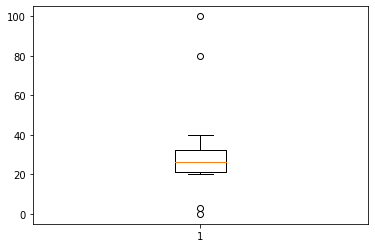

In [69]:
A = plt.boxplot(data)

now that we find our outliers we need to handle them. we can delete outlier or replace them with proper numbers for example mean or median. now lets trim our data.

In [72]:
data_trimmed = data[(data>=5)&(data<=40)]

In [73]:
data_trimmed

array([20, 21, 27, 30, 21, 22, 24, 26, 28, 40, 40, 30])

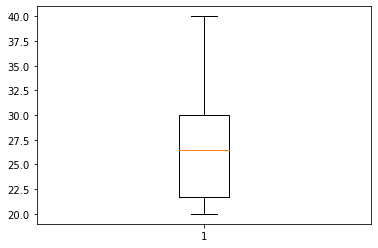

In [74]:
B = plt.boxplot(data_trimmed)

**NOTES**:<br>
   * if data is skewed is better to damped our skewness for example by using log function, because boxplot won't give us proper answer.
   * in boxplot we can change our range by changing our constant value 1.5.
   * there are more methods for detecting outliers and maybe In other chapters I talk about some of them when we learn more about ML algorithms.
   * in my opinion don't mind the outliers, train your model with them, it is good to have some noise in data.

## Feature Engineering

Feature Engineering is the process of using **domain knowledge** to extract new variables from raw data. it can produce new features for both supervised and unsupervised learning, to simplify and speed up data transformations while also enhancing model accuracy. some feature engineering methods are:<br>
   * Creating new features
   * Transforming features (non-linear transformation like using log function to make our data distribution more gaussian)
   * Scaling
   * Handling outliers
   * Data imputation
   * Binning and Discretization of continuous features (what we did in stratifying for regression)
   * Handling categorical data
   * Polynomials and interaction of features for linear models (check next section)<br>

**NOTE**: as you can see we talk about most of these methods in preprocessing section, actually I can't find a proper way to separate these two concepts, maybe there is no difference but I think it is, so I decide to represent it, this way.

## Pipeline

First of all, what is pipeline? pipeline is sequence of steps that take us from raw input into desire output. these steps consist of getting data, data wrangling, preprocessing, modeling and deployments. here we gonna use scikit learn pipeline for **automate** our preprocessing and modeling steps. before we talk about pipeline lets take a look at scikit learn API and its design.<br>
in scikit learn, in general, we have two kind of estimators:<br>
   * Transformers<br>
       * Preprocessing
       * Dimensionality Reduction
       * Feature Extraction
       * Feature Selection
   * Predictors<br>
       * Classification
       * Regression
       * Clustering

the job of transformers are to change our input raw data into desire output data and the predictor uses these data for prediction. both of these estimators have `.fit` method that get data as input and extract desirable parameters for further calculation. for example if we are using `StandardScaler` as a transformer in fit phase it calculate mean and std of data for scaling process. after fitting we can use `.transform` for transformers and `.predict` for our predictors to get our desire output. back to our example, if we use `.transform` for `StandardScaler` it will use mean and std of fit phase and change (scale) our input data. for making pipeline we have to import `sklearn.pipeline.make_pipeline`. there are some other pipeline methods in scikit learn pipeline library but i think this method is much simpler and more straight forward.<br>
in this method we have several transformer step that end up to one predictor step. so what we will do is, instantiate our `.make_pipeline` with parameters that are our transformers and our predictor. then we call `.fit` method on the instantiation that we created and get our desired output.<br>
before we go and see how we can use pipeline lets learn something else and complete our automating process. as you saw before some of these preprocessing steps only implement on specific type of data for example we can use `StandarScaler` only on numerical data and in fact if we have data that contain numerical and categorical data, if we use scaler, we will get error. so the solution is that, we specify which column need scaling and which column need encoding. for that we will use `sklearn.compose.make_column_transformer`, how? so easy, this class will get tuple of transformer and columns as input so it will perform specific transformer on specific columns. lets see how we can use these libraries and automate our process.

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

In [58]:
# creating our custom dataset
X_train = pd.DataFrame({'gender':['M','F','M','M','M','F','F','M','F','F'],
                        'age':[20,30,27,25,23,29,40,34,26,33]})
y_train = pd.DataFrame({'salary':[300,600,500,400,600,400,1000,800,400,700]})

In [59]:
# instantiating our column transformer
ColumnTransformers = make_column_transformer(
                (StandardScaler(),['age']),
                (OneHotEncoder(drop='first'),['gender'])
)
# visualizing the output
CT_output =pd.DataFrame(ColumnTransformers.fit_transform(X_train),columns=['age','gender'])
CT_output

,age,gender
0,-1.567377,1.0
1,0.234206,0.0
2,-0.306269,1.0
3,-0.666586,1.0
4,-1.026902,1.0
5,0.054047,0.0
6,2.035788,0.0
7,0.954839,1.0
8,-0.486427,0.0
9,0.774680,0.0


In [60]:
#instantiate our pipeline
pipe = make_pipeline(ColumnTransformers,PolynomialFeatures(),Ridge())
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [61]:
##accuracy of Ridge() Regression on our transformed training data
pipe.score(X_train,y_train)

0.8448402227439138

**NOTES :**<br>
1. with `PolynomialFeatures()`, we create interactions and polynomials features from our original feature, and somehow make our linear model, non-linear.
2. The reason i choose `X_train` and `y_train` for naming my data is that, we never use `.fit` method on testing dataset because of **Data leakage** purposes.<br>
3. For performing `.fit` and `.transform` at the sametime, we can use `.fit_transform`.